In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Create dataframes from Excel file

df = pd.read_excel('pc_hearing_data.xlsx', sheet_name= 'data')

### Clean data

In [3]:
# Make sure there aren't any rows without person names that we want to keep

df[df['Name'].isna()]

,Name,Address,Neighborhood,Owner / Renter,For / Against,Format,2023 home assessment ($000),Home Value Percentile,Home purchase price ($000),Home purchase year,"Home purchase price, inflation-adjusted ($000)",Katie's Thread
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,Total,In person,Zoom,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,Against,50,30,20,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,For,51,31,20,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop rows where there is no person name

df = df[df['Name'].notna()]

In [5]:
# Clean up whitespace

df_clean = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [6]:
df_clean['Neighborhood'].unique()

array(['JPA', 'Greenbrier', nan, 'Rose Hill', 'Martha Jefferson',
       'Belmont', 'Woolen Mills', 'Albemarle', 'Barracks / Rugby',
       'North Downtown', 'Venable', 'Fifeville', 'Johnson Village',
       'Starr Hill', 'Lewis Mountain', 'Ridge Street', 'Locust Grove',
       "Fry's Spring", '10th and Page'], dtype=object)

In [7]:
df_clean['Owner / Renter'].unique()

array(['Owner', 'Developer', 'Renter', nan, 'Student', 'Renter?'],
      dtype=object)

In [8]:
df_clean['For / Against'].unique()

array(['Against', 'Specific code request', 'For', 'Specific comments',
       'Specific concerns'], dtype=object)

In [9]:
# Function to map values in column 'Owner / Renter' to new column 'role'

def map_owner_or_renter(value):
    if value == 'Owner':
        return 'Homeowner'
    else:
        return 'Renter or other'

# Apply the mapping function to create column 'B'

df_clean['role'] = df_clean['Owner / Renter'].apply(map_owner_or_renter)

In [10]:
# Function to map values in column 'For / Against' to new column 'position'

def map_for_or_against(value):
    if value == 'For':
        return 'For'
    elif value == 'Against':
        return 'Against'
    else:
        return 'Specific comment, concern, or request'

# Apply the mapping function to create column 'position'
df_clean['position'] = df_clean['For / Against'].apply(map_for_or_against)

In [11]:
df_clean['position_and_role'] = df_clean['position'] + ' - ' + df_clean['role']

In [13]:
df_clean['position_and_role'].unique()

array(['Against - Homeowner',
       'Specific comment, concern, or request - Renter or other',
       'For - Homeowner', 'For - Renter or other',
       'Against - Renter or other',
       'Specific comment, concern, or request - Homeowner'], dtype=object)

## Pie chart of zoning position and housing status

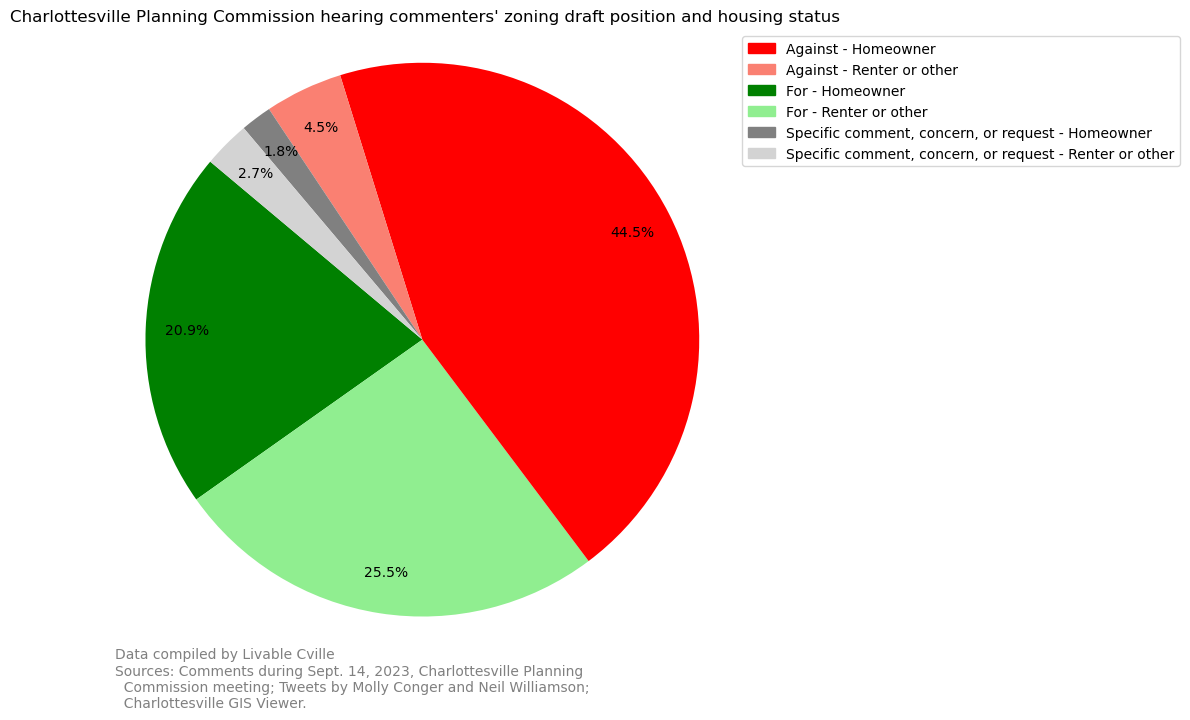

In [14]:
# Define the custom order for the labels
custom_order = [
    'For - Homeowner',
    'For - Renter or other',
    'Against - Homeowner',
    'Against - Renter or other',
    'Specific comment, concern, or request - Homeowner',
    'Specific comment, concern, or request - Renter or other'
]

# Count the occurrences of each 'role_and_position'
counts = df_clean['position_and_role'].value_counts().loc[custom_order]

# Define custom colors for the slices
colors = {
    'Against - Homeowner': 'red',
    'Against - Renter or other': 'salmon',
    'For - Homeowner': 'green',
    'For - Renter or other': 'lightgreen',
    'Specific comment, concern, or request - Homeowner': 'gray',
    'Specific comment, concern, or request - Renter or other': 'lightgray'
}

# Create pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
wedges, texts, _ = plt.pie(counts, startangle=140, colors=[colors.get(label, 'white') for label in counts.index],
                           labels=['' for _ in counts.index], autopct='%1.1f%%', pctdistance=0.85)

# Create a color bar legend in the upper right corner
color_patches = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for label, color in colors.items()]
color_bar = plt.legend(handles=color_patches, loc='upper left', bbox_to_anchor=(1, 1))

# Add title
plt.title('Charlottesville Planning Commission hearing commenters\' zoning draft position and housing status')

# Add percentage labels with distance from the center
for text, wedge in zip(texts, wedges):
    x, y = wedge.center
    distance = 0.85  # Adjust this value to control the distance of percentage labels from the center
    x = x + distance * (x - 0.5)
    text.set_position((x, y))

footnote_text = 'Data compiled by Livable Cville\nSources: Comments during Sept. 14, 2023, Charlottesville Planning\n  Commission meeting; Tweets by Molly Conger and Neil Williamson;\n  Charlottesville GIS Viewer.'
plt.text(0, -.1, footnote_text, ha='left', color='gray', transform=plt.gca().transAxes)
    
# Display the chart
plt.axis('equal')  
plt.show()

## Homeowners plotting

In [15]:
# Create a dataframe of just homeowners

owner_df = df_clean[df_clean['role'] == 'Homeowner']

In [16]:
# Get home price and purchase numbers in the right formats

columns_to_float = [
    '2023 home assessment ($000)', 'Home purchase price ($000)', 'Home purchase price, inflation-adjusted ($000)']

owner_df[columns_to_float] = owner_df[columns_to_float].astype(float)

owner_df['Home purchase year'] = owner_df['Home purchase year'].astype(int)

C:\Users\kdard\AppData\Local\Temp\ipykernel_29936\12880600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_df[columns_to_float] = owner_df[columns_to_float].astype(float)
C:\Users\kdard\AppData\Local\Temp\ipykernel_29936\12880600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_df['Home purchase year'] = owner_df['Home purchase year'].astype(int)


In [17]:
# Create custom color map based on For/Against values

color_mapping = {'For': 'green', 'Against': 'red', 'Specific comment, concern, or request': 'gray'}

colors = owner_df['position'].map(color_mapping)

In [18]:
## Create scaled-down values for bubble-size purposes

scaling_factor = 0.3

owner_df['scaled_home_prices'] = owner_df['Home purchase price, inflation-adjusted ($000)'] * scaling_factor

owner_df['scaled_home_assessments'] = owner_df['2023 home assessment ($000)'] * scaling_factor

C:\Users\kdard\AppData\Local\Temp\ipykernel_29936\4080649024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_df['scaled_home_prices'] = owner_df['Home purchase price, inflation-adjusted ($000)'] * scaling_factor
C:\Users\kdard\AppData\Local\Temp\ipykernel_29936\4080649024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_df['scaled_home_assessments'] = owner_df['2023 home assessment ($000)'] * scaling_factor


### Scatter option 1: Bubble size = home assessment; home prices (not adjusted for inflation) on Y axis

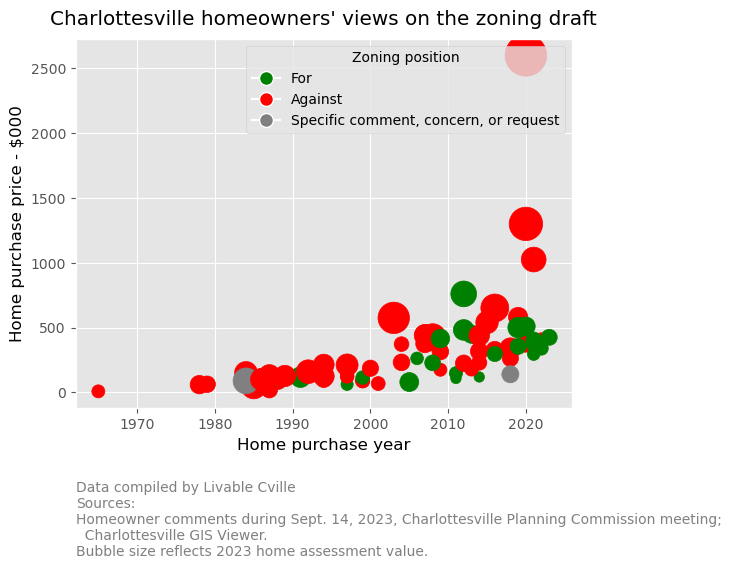

In [19]:
# Create bubble plot with bubble size based on home assessment (actual home purchase prices on Y axis)

plt.style.use('ggplot')

scatter = plt.scatter('Home purchase year', 'Home purchase price ($000)',
                      s=owner_df['scaled_home_assessments'],
                      c=colors,  
                      data=owner_df)

## Add legend

legend_labels = list(color_mapping.keys())

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) for label in legend_labels]

plt.legend(legend_handles, legend_labels, title="Zoning position", loc="upper right")

## Add axis labels

plt.xlabel('Home purchase year', color='black')
plt.ylabel('Home purchase price - $000', color='black')

## Add a title

plt.title('Charlottesville homeowners\' views on the zoning draft', pad=10)

## Add footnotes

footnote_text = 'Data compiled by Livable Cville\nSources:\nHomeowner comments during Sept. 14, 2023, Charlottesville Planning Commission meeting;\n  Charlottesville GIS Viewer.\nBubble size reflects 2023 home assessment value.'
plt.text(0, -.4, footnote_text, ha='left', color='gray', transform=plt.gca().transAxes)

## Show the bubble plot

plt.show()

### Scatter option 2: Bubble size = home assessment; inflation-adjusted purchase prices on Y axis

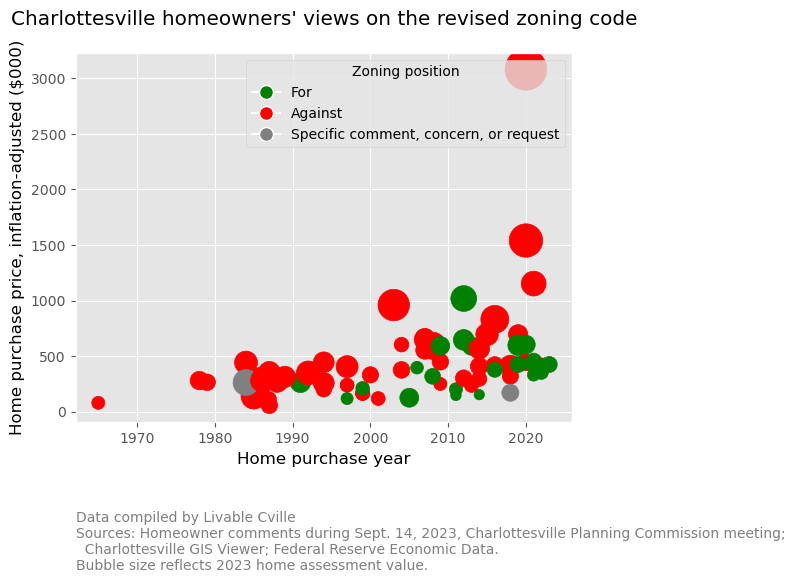

In [20]:
# Create bubble plot with bubble size based on home assessment (inflation-adjusted home purchase prices on Y axis)

plt.style.use('ggplot')

scatter = plt.scatter('Home purchase year', 'Home purchase price, inflation-adjusted ($000)',
                      s=owner_df['scaled_home_assessments'],
                      c=colors,  
                      data=owner_df)

## Add legend

legend_labels = list(color_mapping.keys())

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) for label in legend_labels]

plt.legend(legend_handles, legend_labels, title="Zoning position", loc="upper right")

## Add axis labels

plt.xlabel('Home purchase year', color='black')
plt.ylabel('Home purchase price, inflation-adjusted ($000)', color='black')

## Add a title

plt.title('Charlottesville homeowners\' views on the revised zoning code', pad=20)

## Add footnotes

footnote_text = 'Data compiled by Livable Cville\nSources: Homeowner comments during Sept. 14, 2023, Charlottesville Planning Commission meeting;\n  Charlottesville GIS Viewer; Federal Reserve Economic Data.\nBubble size reflects 2023 home assessment value.'
plt.text(0, -.4, footnote_text, ha='left', color='gray', transform=plt.gca().transAxes)

## Show the bubble plot

plt.show()

### Scatter option 3: Bubble size = inflation-adjusted home purchase price; assessment value on Y axis

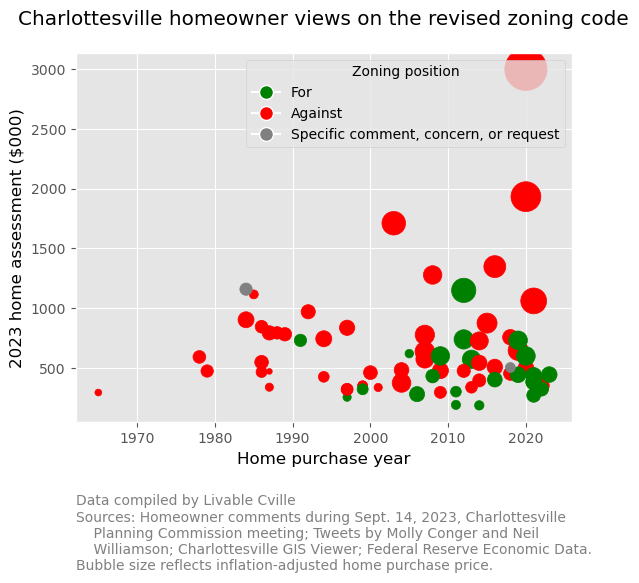

In [21]:
# Create bubble plot with bubble size based on inflation-adjusted home purchase prices (home assessment on Y axis)

plt.style.use('ggplot')

scatter = plt.scatter('Home purchase year', '2023 home assessment ($000)',
                      s=owner_df['scaled_home_prices'],
                      c=colors,  
                      data=owner_df)

## Add legend

legend_labels = list(color_mapping.keys())

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) for label in legend_labels]

plt.legend(legend_handles, legend_labels, title="Zoning position", loc="upper right")

## Add axis labels

plt.xlabel('Home purchase year', color='black')
plt.ylabel('2023 home assessment ($000)', color='black')

## Add a title

plt.title('Charlottesville homeowner views on the revised zoning code', pad=20)

# ## Cannot get the bubble legend to work #$@^!
# bubble_sizes = [33.333333333333336, 100, 166.66666666666666, 333.3333333333333]  # Accounting for scaling factor
# bubble_labels = ['100', '300', '500', '1,000']  

# plt.scatter([], [], c='k', alpha=0.5, s=bubble_sizes[0], label='', marker='o')

# for size, label in zip(bubble_sizes, bubble_labels):
#     plt.scatter([], [], c='k', alpha=0.5, s=size, label=label)

# plt.legend(scatterpoints=1, frameon=False, title='Bubble Size', loc='upper left')

## Add footnotes

footnote_text = 'Data compiled by Livable Cville\nSources: Homeowner comments during Sept. 14, 2023, Charlottesville\n    Planning Commission meeting; Tweets by Molly Conger and Neil\n    Williamson; Charlottesville GIS Viewer; Federal Reserve Economic Data.\nBubble size reflects inflation-adjusted home purchase price.'
plt.text(0, -.4, footnote_text, ha='left', color='gray', transform=plt.gca().transAxes)

## Show the bubble plot

plt.show()